In [14]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [15]:
def m_i(m,C,n): #def function for M
    return m*C**n

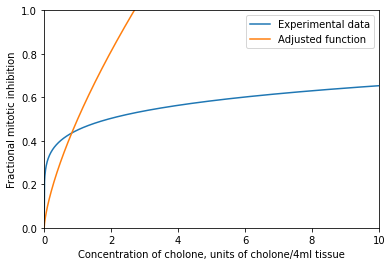

In [16]:
C = np.linspace(0,10,1000)
m = 0.45
n = 0.162
m1= 0.5
n1=0.7
plt.plot(C,m_i(m,C,n),label='Experimental data')
plt.plot(C,m_i(m1,C,n1),label='Adjusted function')
plt.xlabel('Concentration of cholone, units of cholone/4ml tissue')
plt.ylabel('Fractional mitotic inhibition')
plt.xlim(0,10)
plt.ylim(0,1)
plt.legend(loc='best')

In [17]:
def bq(b,E,q): #def function for B
    return b*E**q

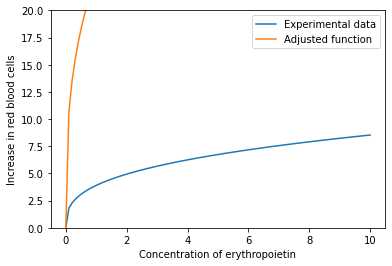

In [18]:
E = np.linspace(0,10,100)
b1=3.9
q1=0.34
b2=23.13
plt.plot(E,bq(b1,E,q1),label='Experimental data')
plt.plot(E,bq(b2,E,q1),label='Adjusted function')
plt.xlabel('Concentration of erythropoietin')
plt.ylabel('Increase in red blood cells')
plt.ylim(0,20)
plt.legend(loc='best')

In [19]:
#Stem cells simulation in the first case
S=0.09
S1=0.1
C1=0.5
C=0.5
t=0
steps=1
m=0.5
n=0.65
A=0.8
omega = 0.2
r=0.4
u=0.2
eta=0.9
S_list=[]
C_list=[]
S_eta=[]
while t<=300:
    t = t+steps
    M1 = 1-m*C1**n
    dS = S1*A*M1-S*A*omega
    dC = r*S-u*C
    C1 = C
    S1 = S
    S = S+dS*steps
    C = C+dC*steps
    S_eta.append(eta*S*m*C**n)
    S_list.append(S)
    C_list.append(C)

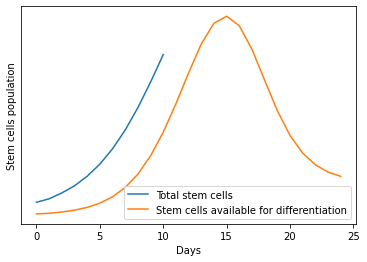

In [20]:
t=np.linspace(0,24,25)
t1=np.linspace(0,10,11)
plt.xlabel('Days')
plt.ylabel('Stem cells population')
plt.plot(t1,S_list[:11],label='Total stem cells')
plt.plot(t,S_eta[:25],label='Stem cells available for differentiation')
plt.yticks([])
plt.legend(loc='best')

([], [])

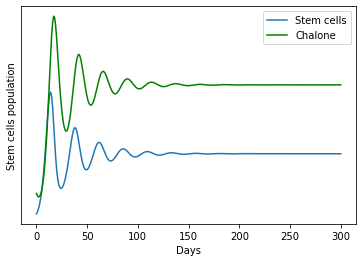

In [21]:
# Long term behavior for stem cells and Chalone population in the first case
t=np.linspace(0,300,301)
plt.xlabel('Days')
plt.ylabel('Stem cells population')
plt.plot(t,S_list,label='Stem cells')
plt.plot(t,C_list,label='Chalone',color='green')
plt.legend(loc='best')
plt.yticks([])

In [22]:
# Simulation for Reticulocyte population in the third case
def F_fun(R):
    return 0
S=0.01*2
S1=0.04
C1=0.5
C=0.05
E=0.8
R=14
E1=0.5
t=0
steps=1
m=0.5
n=0.4
A=0.08
omega = 0.6
r=0.8
u=0.2
a=0.5
beta=0.1
z=9
e=0.3
b=23.13
q=0.34
k=20
S_list=[]
C_list=[]
R_list=[]
E_list=[]
while t<=60:
    t = t+steps
    M1 = 1-m*C1**n
    dE = a/(1+beta*R**z)-e*E
    dS = S1*A*M1-S*A*(omega+b*E**q)
    dC = r*S-u*C
    dR = k*(b*E1**q)*A*S1-F_fun(R)
    C1 = C
    S1 = S
    E1 = E
    S = S+dS*steps
    C = C+dC*steps
    E = E+dE*steps
    R = R+dR*steps
    S_list.append(S)
    C_list.append(C)
    R_list.append(0.002*R)
    E_list.append(0.1*E)

([], [])

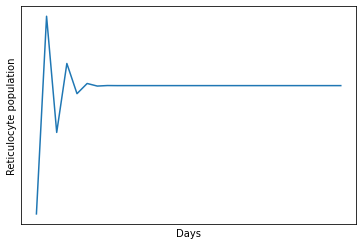

In [23]:
t=np.linspace(0,30,31)
model=make_interp_spline(t, R_list[:31]) # Smooth
Rs=model(R_list[:31])
plt.xlabel('Days')
plt.ylabel('Reticulocyte population')
#plt.plot(t,S_list)
plt.plot(t,Rs)
#plt.plot(t,E_list[:31])
#plt.plot(t,C_list[:31])
#plt.plot(t,S_list[:31],label='Stem cells')
plt.xticks([])
plt.yticks([])